In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

sensus = {
    'tinggi': [158, 170, 183,191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67 ],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


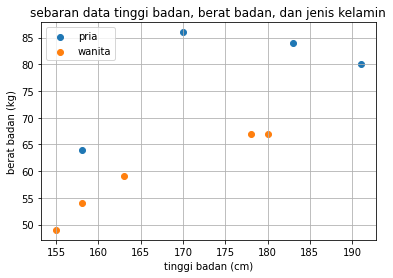

In [ ]:
fix, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

    
plt.legend(loc='upper left')
plt.title('sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)') 
plt.grid(True)
plt.show()

### Data Preprocessing

In [ ]:
import numpy as np

X_train = np.array(sensus_df[['berat', 'tinggi']])
y_train = np.array(sensus_df['jk'])


print(f"X_Train =\n {X_train}\n")
print(f"y_train = {y_train}")

X_Train =
 [[ 64 158]
 [ 86 170]
 [ 84 183]
 [ 80 191]
 [ 49 155]
 [ 59 163]
 [ 67 180]
 [ 54 158]
 [ 67 178]]

y_train = ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [ ]:
## mengubah target menjadi binner

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f"y_train:\n {y_train}")

y_train:
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


### Nilai 0 akan merepresentasikan nilai pria sedangkan 1 merepresentasikan nilai wanita

In [ ]:
### kemabalikan ke array 1 dimensi

y_train = y_train.flatten()
print(f"y_train : {y_train}")

y_train : [0 0 0 0 1 1 1 1 1]


### Training model Dengan Algoritma Maschine Learning KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
K=3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
### Prediksi data jenis kelamin

tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [ ]:
y_new = model.predict(X_new)
y_new

array([0])

In [ ]:
lb.inverse_transform(y_new)

array(['pria'], dtype='<U6')

### Visualiasasi Nearest Neightbors

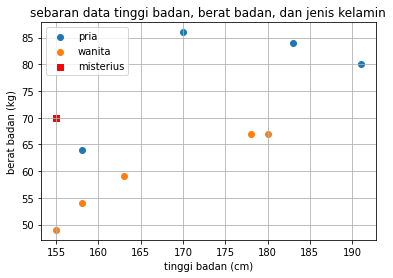

In [ ]:
fix, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
plt.scatter(tinggi_badan,
           berat_badan,marker='s',
           color="red",
           label="misterius"
           )
    
plt.legend(loc='upper left')
plt.title('sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)') 
plt.grid(True)
plt.show()

### Melakukan Hyper Parameter Dengan K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=4)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.66666667 0.5        1.         1.        ]
cv_scores mean:0.7916666666666666


### Hasil Prediksi akhir menunjukan hasil score 0.79